## **`Mount google drive to access the dataset`**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing libraries**

In [ ]:
!pip install tensorflow==2.11.0

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from tqdm import tqdm
from sklearn.utils import shuffle
import os

In [4]:
train_data_dir='/content/drive/MyDrive/Brain tumor classification project/Training'
test_data_dir='/content/drive/MyDrive/Brain tumor classification project/Testing'

In [5]:
labels=['glioma','meningioma','notumor','pituitary']

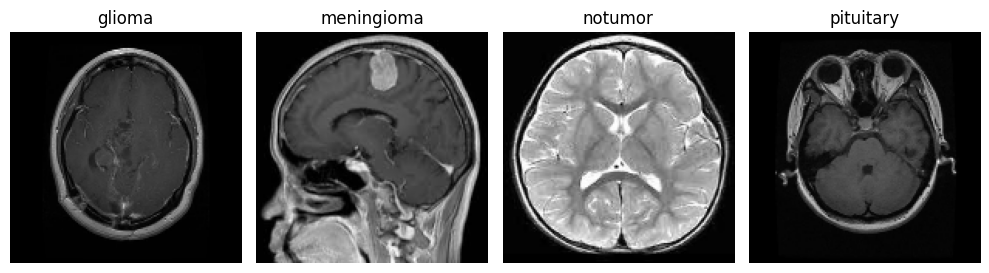

In [6]:
image_size=150
plt.figure(figsize=(10, 5))

for i, label in enumerate(labels):
  folderpath=os.path.join(train_data_dir,label)
  for j in os.listdir(folderpath):
    img=cv2.imread(os.path.join(folderpath,j))
    img=cv2.resize(img,(image_size,image_size))
    plt.subplot(1, len(labels), i+1)  # Create subplots for each class
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    break

plt.tight_layout()
plt.show()

In [7]:
train_data=[]
train_data_labels=[]
my_dictionary_data={'tumor':[],'frequency':[]}
image_size=150
labels=['glioma','meningioma','notumor','pituitary']
for i in labels:
   folderpath=os.path.join('/content/drive/MyDrive/Brain tumor classification project/Training',i)
   for j in os.listdir(folderpath):
        img_path=os.path.join(folderpath,j)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(image_size,image_size))
        train_data.append(img)
        train_data_labels.append(i)
   my_dictionary_data['tumor'].append(i)
   my_dictionary_data['frequency'].append(len(os.listdir(folderpath)))

In [8]:
train_data=np.array(train_data)
train_data_labels=np.array(train_data_labels)

In [9]:
train_data_labels

array(['glioma', 'glioma', 'glioma', ..., 'pituitary', 'pituitary',
       'pituitary'], dtype='<U10')

In [10]:
my_dictionary_data

{'tumor': ['glioma', 'meningioma', 'notumor', 'pituitary'],
 'frequency': [1321, 1339, 1595, 1457]}

In [11]:
df_data=pd.DataFrame(my_dictionary_data)
df_data

,tumor,frequency
0,glioma,1321
1,meningioma,1339
2,notumor,1595
3,pituitary,1457


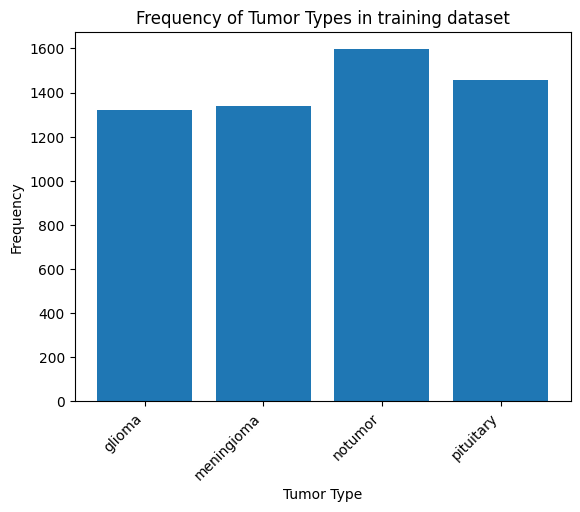

In [12]:
import matplotlib.pyplot as plt
import numpy as np

tumor_list=my_dictionary_data['tumor']
frequency_list=my_dictionary_data['frequency']
plt.bar(tumor_list,frequency_list)
plt.xlabel('Tumor Type')
plt.ylabel('Frequency')
plt.title('Frequency of Tumor Types in training dataset')
_ = plt.xticks(rotation=45, ha='right')


In [13]:
test_data=[]
test_data_labels=[]
my_dictionary_data={'tumor':[],'frequency':[]}
image_size=150
labels=['glioma','meningioma','notumor','pituitary']
for i in labels:
   folderpath=os.path.join('/content/drive/MyDrive/Brain tumor classification project/Training',i)
   for j in os.listdir(folderpath):
        img_path=os.path.join(folderpath,j)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(image_size,image_size))
        test_data.append(img)
        test_data_labels.append(i)

In [14]:
test_data=np.array(test_data)
test_data_labels=np.array(test_data_labels)

In [16]:
test_data_labels

array(['glioma', 'glioma', 'glioma', ..., 'pituitary', 'pituitary',
       'pituitary'], dtype='<U10')

In [17]:
train_data,train_data_labels=shuffle(train_data,train_data_labels,random_state=101)
test_data,test_data_labels=shuffle(test_data,test_data_labels,random_state=101)

In [18]:
y_train_new=[]
for i in train_data_labels:
  y_train_new.append(labels.index(i))
train_data_labels=y_train_new
train_data_labels=tf.keras.utils.to_categorical(train_data_labels)

In [19]:
y_test_new=[]
for i in test_data_labels:
  y_test_new.append(labels.index(i))
test_data_labels=y_test_new
test_data_labels=tf.keras.utils.to_categorical(test_data_labels)

In [20]:
test_data_labels

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

### **Define a CNN model**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

In [23]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 128)      5

In [25]:
early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=1,
    restore_best_weights=False
)

### **Train the CNN model**

In [26]:
history = model.fit(train_data,train_data_labels,epochs=50,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/50
143/143 [==============================] - 1066s 7s/step - loss: 1.6491 - accuracy: 0.6030 - val_loss: 1.2753 - val_accuracy: 0.7087
Epoch 2/50
143/143 [==============================] - 1040s 7s/step - loss: 1.1544 - accuracy: 0.7476 - val_loss: 0.9803 - val_accuracy: 0.8268
Epoch 3/50
143/143 [==============================] - 1053s 7s/step - loss: 1.0367 - accuracy: 0.7958 - val_loss: 0.9349 - val_accuracy: 0.8565
Epoch 4/50
143/143 [==============================] - 1005s 7s/step - loss: 0.9379 - accuracy: 0.8348 - val_loss: 0.9022 - val_accuracy: 0.8609
Epoch 5/50
143/143 [==============================] - 1007s 7s/step - loss: 0.8562 - accuracy: 0.8698 - val_loss: 0.8271 - val_accuracy: 0.8889
Epoch 6/50
143/143 [==============================] - 1032s 7s/step - loss: 0.8010 - accuracy: 0.8866 - val_loss: 0.8655 - val_accuracy: 0.8749
Epoch 7/50
143/143 [==============================] - 1032s 7s/step - loss: 0.7370 - accuracy: 0.9092 - val_loss: 0.8440 - val_accuracy:

### **Plotting training accuracy and validation accuracy**

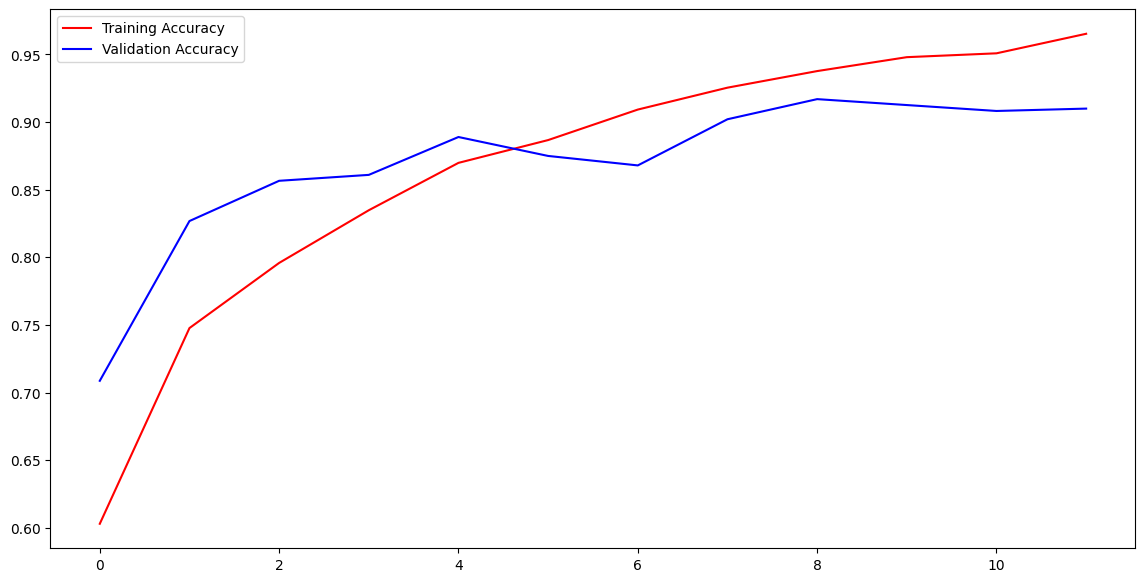

In [27]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

### **Plotting training loss and validation loss**

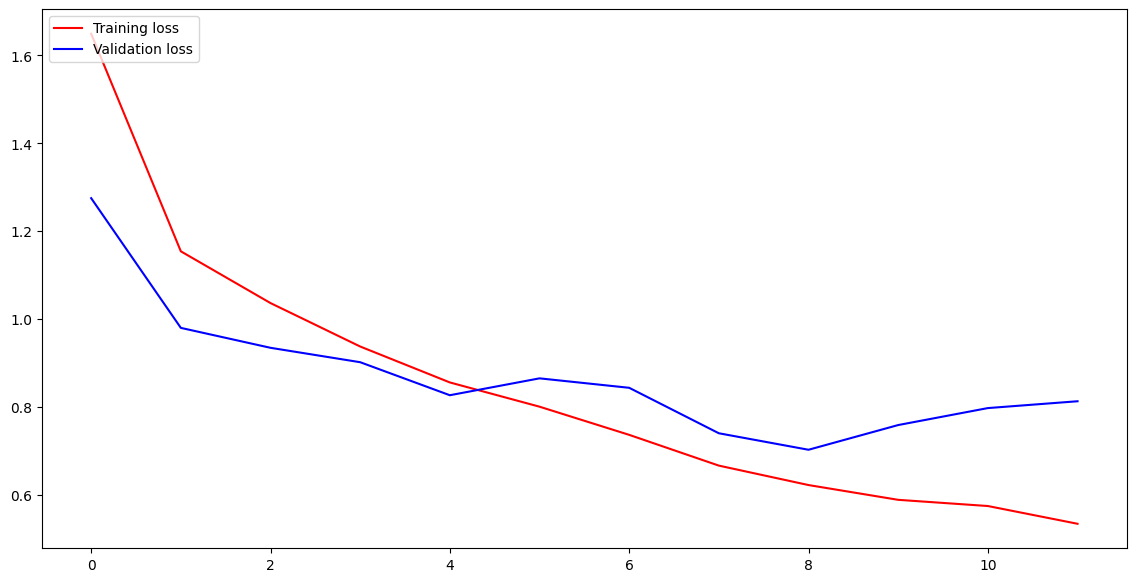

In [28]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend(loc='upper left')
plt.show()

### **Prediction on test data**

In [29]:
y_pred=model.predict(test_data)
y_pred_indices=np.argmax(y_pred,axis=1)

179/179 [==============================] - 291s 2s/step


In [30]:
y_pred_indices

array([2, 1, 2, ..., 1, 1, 3])

In [31]:
y_test_indices=np.argmax(test_data_labels,axis=1)
accuracy=accuracy_score(y_test_indices,y_pred_indices)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 96.88%


### **Evaluate model performance**

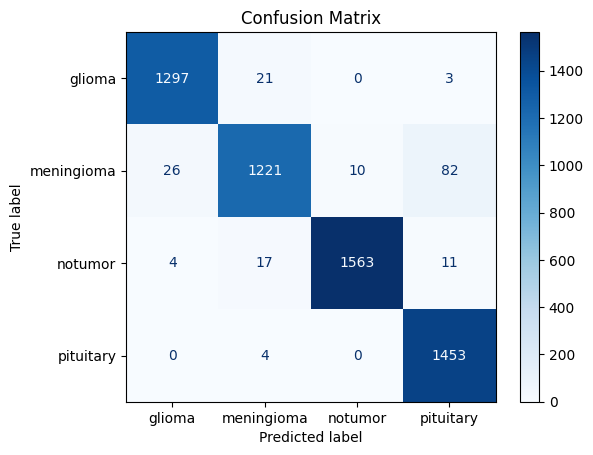

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(y_test_indices,y_pred_indices, labels=range(len(labels)))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [33]:
print(classification_report(y_test_indices, y_pred_indices, target_names=labels))

              precision    recall  f1-score   support

      glioma       0.98      0.98      0.98      1321
  meningioma       0.97      0.91      0.94      1339
     notumor       0.99      0.98      0.99      1595
   pituitary       0.94      1.00      0.97      1457

    accuracy                           0.97      5712
   macro avg       0.97      0.97      0.97      5712
weighted avg       0.97      0.97      0.97      5712



In [34]:
from tensorflow.keras.models import load_model
model.save("brain_tumor_classifier_model.h5")